In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from time import perf_counter
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from IPython.display import Markdown, display
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

In [36]:
# Create a list with the filepaths for training and testing
ext = ['jpeg', 'jpg', 'png']    # Add image formats here

files = []
file_paths = []
dir_ = Path("C:\\Users\\rizky\\Bangkit2021\\Project\\SIBI_SL\\danrasband_sign_test")
[files.extend(list(dir_.glob(r"**/*" + e )) for e in ext)]
for i in range(len(files)):
    file_paths.extend(files[i])
print(len(file_paths))

780


In [37]:
#Number of pictures and different labels in dataset
def proc_img(filepath):

    labels = [str(filepath[i]).split("\\")[-2] \
              for i in range(len(filepath))]
    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')
    print(labels.unique())
    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1,random_state=0).reset_index(drop = True)
    
    return df

df = proc_img(file_paths)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


In [38]:
df = df[df.Label != 'J']
df = df[df.Label != 'Z']

In [46]:
test_generator = ImageDataGenerator(
   
)
test_images = test_generator.flow_from_dataframe(
    dataframe=df,
    x_col='Filepath',
    y_col='Label',
    target_size=(200, 200),
    color_mode='rgb',
    class_mode='categorical',
)

Found 720 validated image filenames belonging to 24 classes.


In [40]:
model = tf.keras.models.load_model("C:\\Users\\rizky\\Bangkit2021\\Project\\Capstone-SIBI\\ml\\ModelMnistIncept\\model.h5")

In [43]:
score = model.evaluate(test_images)

23/23 [==============================] - 3s 76ms/step - loss: 426.9176 - accuracy: 0.0542


In [47]:
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

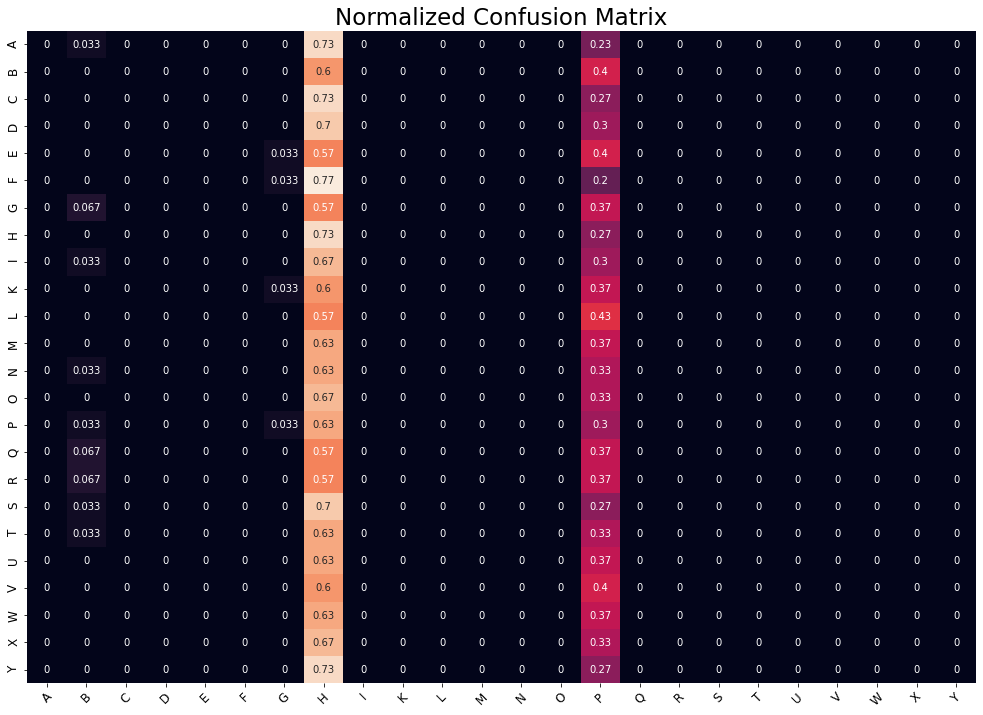

In [48]:
# Map the label
labels = (test_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Get the accuracy on the test set
y_test = list(df.Label)
acc = accuracy_score(y_test,pred)

# Display a confusion matrix
cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (17,12))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)),cbar=False)
plt.title('Normalized Confusion Matrix', fontsize = 23)
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12)
plt.savefig("conf_matrix.png")
plt.show()

In [1]:
model_mnist = tf.keras.models.load_model("C:\\Users\\rizky\\Bangkit2021\\Project\\Capstone-SIBI\\ml\\ModelV2NoAug\model.h5")

NameError: name 'tf' is not defined

In [9]:
df = df[df.Label != 'J']

In [10]:
df = df[df.Label != 'Z']

In [11]:
train_df, test_df = train_test_split(df,test_size=0.99, random_state=42)

In [12]:
train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.inception_v3.preprocess_input,
    validation_split=0.1
)

test_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.inception_v3.preprocess_input
)

train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    subset='training',
    brightness_range=[0.7,1.3]
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    subset='validation',
    brightness_range=[0.7,1.3]
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 324 validated image filenames belonging to 24 classes.
Found 36 validated image filenames belonging to 24 classes.
Found 35640 validated image filenames belonging to 24 classes.


In [15]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
tf.config.set_visible_devices([], 'GPU')

c:\users\rizky\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


RuntimeError: Visible devices cannot be modified after being initialized

In [14]:
pred = model_mnist.predict(test_images)
pred = np.argmax(pred,axis=1)

NotFoundError:  No algorithm worked!
	 [[node sequential/conv2d/Conv2D (defined at <ipython-input-14-453080d531c0>:1) ]] [Op:__inference_predict_function_1083]

Function call stack:
predict_function


In [16]:
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Get the accuracy on the test set
y_test = list(test_df.Label)
acc = accuracy_score(y_test,pred)

# Display a confusion matrix
cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (17,12))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)),cbar=False)
plt.title('Normalized Confusion Matrix', fontsize = 23)
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12)
plt.savefig("conf_matrix_mnist.png")
plt.show()


NameError: name 'pred' is not defined